##Boosting Regressors (comparison of Random Forest, Gradient Boosting and AdaBoost)

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
boston = load_boston()
# House Prices
y = boston.target
# The other 13 features
x = boston.data

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [4]:
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,
                           random_state=1)

gdbr = GradientBoostingRegressor(learning_rate=0.1,
                                 loss='ls',
                                 n_estimators=100,
                                 random_state=1)

abr = AdaBoostRegressor(DecisionTreeRegressor(),
                        learning_rate=0.1,
                        loss='linear',
                        n_estimators=100,
                        random_state=1)

rf

RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0)

In [5]:
print cross_val_score(rf, x_train, y_train, 'mean_squared_error', cv=10).mean()
print cross_val_score(rf, x_train, y_train, 'r2', cv=10).mean()

rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_rf

-9.88141195451
0.86629619165


8.704199470588236

In [6]:
print cross_val_score(gdbr, x_train, y_train, 'mean_squared_error', cv=10).mean()
print cross_val_score(gdbr, x_train, y_train, 'r2', cv=10).mean()

-8.45283652685
0.885716481682


In [7]:
print cross_val_score(abr, x_train, y_train, 'mean_squared_error', cv=10).mean()
print cross_val_score(abr, x_train, y_train, 'r2', cv=10).mean()

-10.3348920732
0.860521860131


In [8]:
#gradient boosting. because there is no parameter tuning yet

###Effects of learning rate

In [9]:
gdbr_lr1 = GradientBoostingRegressor(learning_rate=1,
                                 loss='ls',
                                 n_estimators=100,
                                 random_state=1)

In [10]:
print cross_val_score(gdbr_lr1, x_train, y_train, 'mean_squared_error', cv=10).mean()
print cross_val_score(gdbr_lr1, x_train, y_train, 'r2', cv=10).mean()

-21.0060525772
0.7273889718


In [11]:
#mse is higher when learning rate is lower

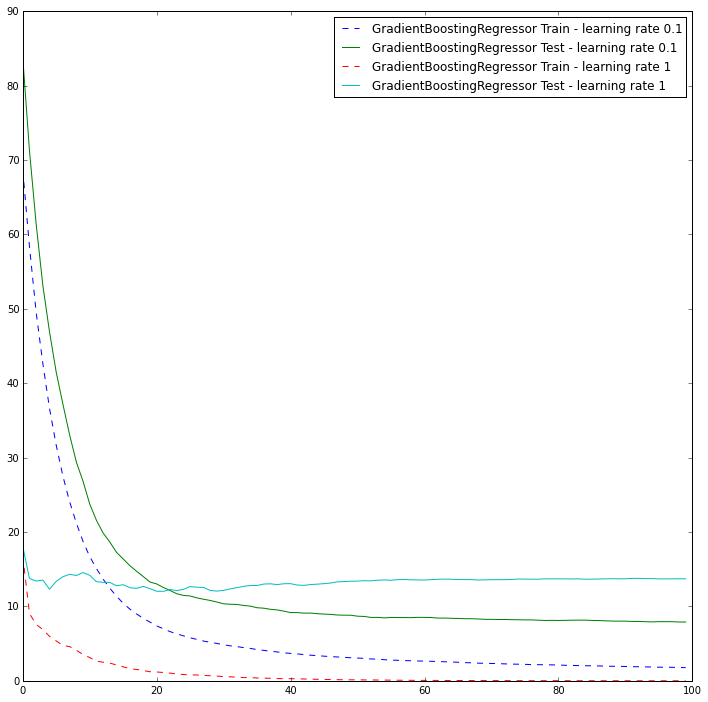

In [12]:
def stage_score_plot(model, train_x, train_y, test_x, test_y):
    model.fit(train_x, train_y)
    pred_y_train = model.staged_predict(train_x)
    pred_y_test = model.staged_predict(test_x)
    iterations = []
    train_mse = []
    test_mse = []

    for i, val in enumerate(pred_y_train):
        iterations.append(i)
        mse = mean_squared_error(train_y, val)
        train_mse.append(mse)
        
    for i, val in enumerate(pred_y_test):
        mse = mean_squared_error(test_y, val)
        test_mse.append(mse)
    
    model_n = model.__class__.__name__
    model_lr = model.learning_rate
    
    plt.plot(iterations, train_mse, label='%s Train - learning rate %s' %(model_n, model_lr), linestyle='--')
    plt.plot(iterations, test_mse, label='%s Test - learning rate %s' %(model_n, model_lr))

    
plt.figure(figsize=(12,12))    
#learning rate = 0.1    
stage_score_plot(gdbr, x_train, y_train, x_test, y_test)
#learning rate = 1
stage_score_plot(gdbr_lr1, x_train, y_train, x_test, y_test)

plt.legend()
plt.show()

In [13]:
#More iterations are required for a lower learning rate to achieve a
#low test error

###Comparing w/ Random Forest

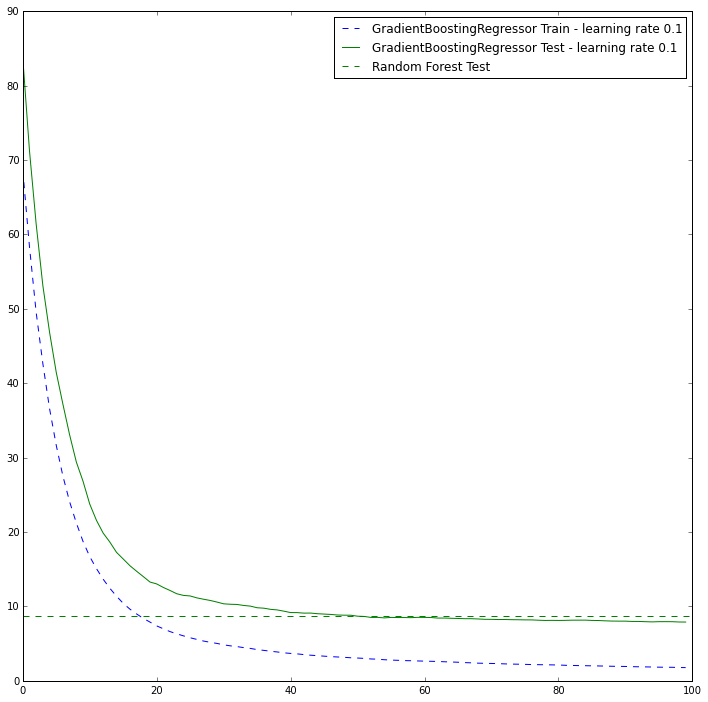

In [14]:
plt.figure(figsize=(12,12))    
#learning rate = 0.1, GDBR    
stage_score_plot(gdbr, x_train, y_train, x_test, y_test)
#RF
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred)
plt.hlines(mse_rf, 0, 100, colors='green', linestyles='--', label='Random Forest Test')
plt.legend()
plt.show()

In [15]:
#More than 60 iterations

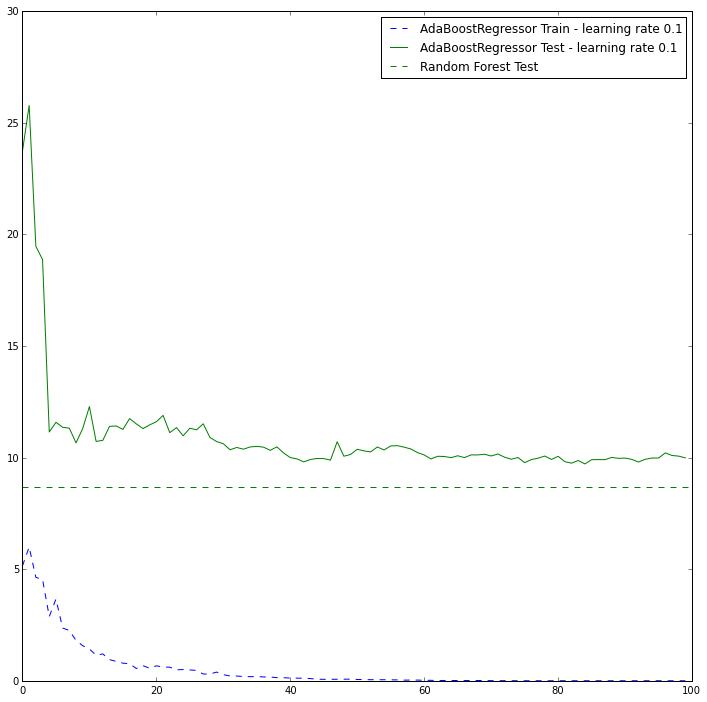

In [16]:
plt.figure(figsize=(12,12))    
#learning rate = 0.1, abr    
stage_score_plot(abr, x_train, y_train, x_test, y_test)
#RF
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred)
plt.hlines(mse_rf, 0, 100, colors='green', linestyles='--', label='Random Forest Test')

plt.legend()
plt.show()

###Adaboost never beat Random Forest

In [70]:
random_forest_grid = {'max_depth': [3, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [1, 2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [10, 50, 100, 150],
                      'random_state': [1]}

rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='mean_squared_error')
rf_gridsearch.fit(x_train, y_train)

print "best parameters:", rf_gridsearch.best_params_ #optimal params for rf

best_rf_model = rf_gridsearch.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 jobs       | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 jobs       | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 450 jobs       | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 800 jobs       | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 1250 jobs       | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:   45.8s finished


best parameters: {'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 150, 'min_samples_split': 1, 'random_state': 1, 'max_features': None, 'max_depth': None}


In [73]:
y_pred_rf = best_rf_model.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_rf
#11. marginally better than 8.704199470588236 

8.4579661481481363

In [23]:
gbdr_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
           'max_depth': [4, 6],
           'min_samples_leaf': [3, 5, 9, 17],
           'max_features': [1.0, 0.3, 0.1],
           'n_estimators': [500],
           'random_state': [1]}

gbdr_gridsearch = GridSearchCV(GradientBoostingRegressor(),
                             gbdr_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='mean_squared_error')

gbdr_gridsearch.fit(x_train, y_train)

print "best parameters:", gbdr_gridsearch.best_params_ #optimal params for rf

best_gbdr_model = gbdr_gridsearch.best_estimator_

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  50 jobs       | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 200 jobs       | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 282 out of 288 | elapsed:   21.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:   21.3s finished


best parameters: {'learning_rate': 0.02, 'min_samples_leaf': 3, 'n_estimators': 500, 'random_state': 1, 'max_features': 0.3, 'max_depth': 4}


In [24]:
y_pred_gbdr = best_gbdr_model.predict(x_test)
mse_gbdr = mean_squared_error(y_test, y_pred_gbdr)
mse_gbdr

8.5725758384447168

###Gridsearch version only marginally better

###Feature importance plot

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per $10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population


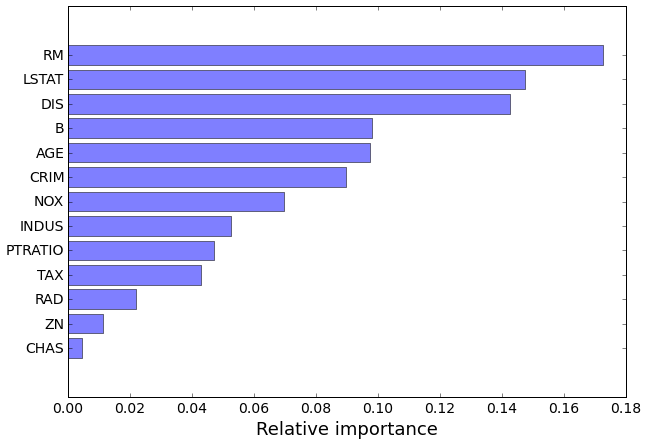

In [26]:
col_names = boston.feature_names
# sort importances
indices = np.argsort(best_gbdr_model.feature_importances_)
# plot as bar chart
figure = plt.figure(figsize=(10,7))
plt.barh(np.arange(len(col_names)), best_gbdr_model.feature_importances_[indices],
         align='center', alpha=.5)
plt.yticks(np.arange(len(col_names)), np.array(col_names)[indices], fontsize=14)
plt.xticks(fontsize=14)
_ = plt.xlabel('Relative importance', fontsize=18)

print '''1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per $10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population'''

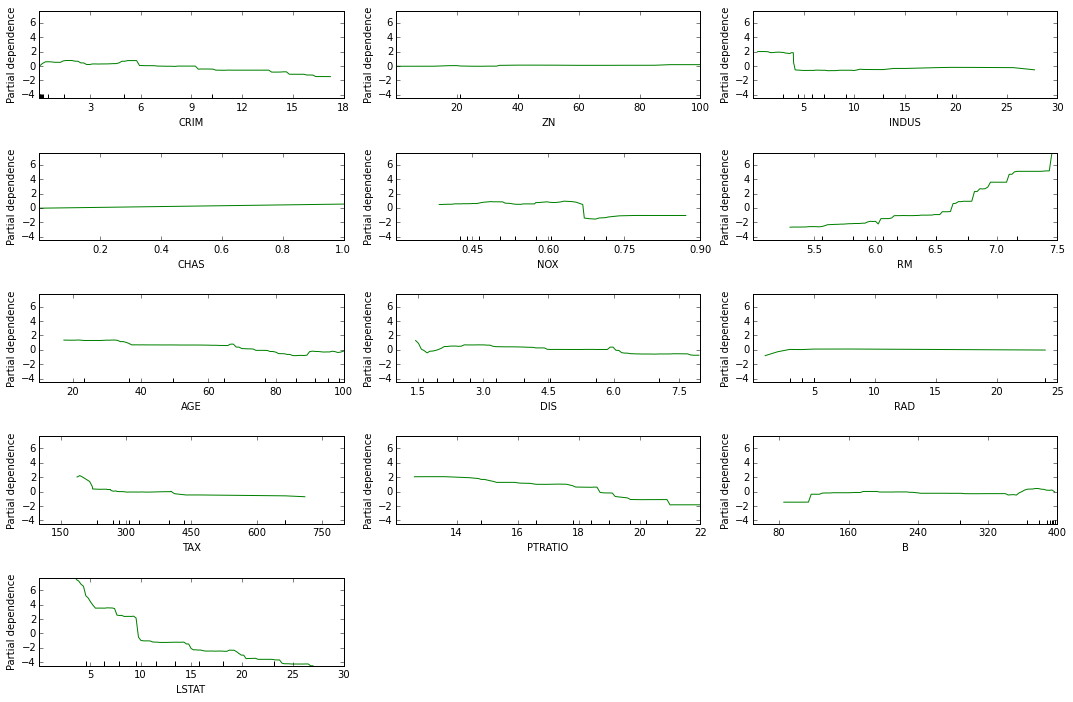

In [28]:
fig, axs = plot_partial_dependence(best_gbdr_model, x_train, 
                                   range(x.shape[1]),
                                   feature_names=col_names, figsize=(15, 10))
fig.tight_layout()